#### #we use cv lib. for work on image ,
#### #matplot  lib. for show the image and  
#### #numpy lib. for work on array to provide result

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## read dataset of age and gender given by sir which refer to website - https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ 

In [51]:
img = cv2.imread(input_img)

NameError: name 'img1' is not defined

#### input_img refer to input image by the  testing file

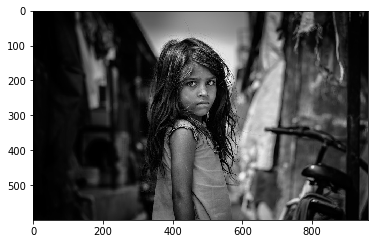

In [62]:
plt.imshow(img[:,:,::-1])

#### plt.imshow(img) basically this command used for show the image

In [63]:
detector_path = "C:/Users/prash/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml"
detector = cv2.CascadeClassifier(detector_path)

#### cv provide us a detector which is used for face detection , emotion , classification of image etc.... in which we call frontalface for detect face

In [64]:
faces = detector.detectMultiScale(img,1.3,5)

In [33]:
faces

array([[418, 159, 136, 136]], dtype=int32)

### these are coordinate of image eq-x = 175,y= 86,w = 273,h = 273.

In [34]:
x, y, w, h = faces[0]

In [35]:
detected_face = img[int(y):int(y+h),int(x):int(x+w)]

In [36]:
detected_face = cv2.resize(detected_face,(224,224))

In [37]:
detected_face.shape

(224, 224, 3)

### we resize it because input dim are given as our dataset is 224 ,224

#### input: "data"
##### input_dim: 1
##### input_dim: 3
##### input_dim: 224
##### input_dim: 224

In [38]:
detected_face_blob =cv2.dnn.blobFromImage(detected_face)

In [39]:
detected_face_blob.shape

(1, 3, 224, 224)

In [40]:
age_model.setInput(detected_face_blob)
age_result = age_model.forward()

gender_model.setInput(detected_face_blob)
gender_result = gender_model.forward()

In [41]:
gender_result

array([[0.9313946 , 0.06860544]], dtype=float32)

### this array show that value of women and men respectively. that is for women = 0.9903218 and for men = 0.00967821

In [42]:
np.argmax(gender_result[0])

0

#### for index 0 it means it is women  and hence it argmax value is 0 so at this point we can make condition 

In [43]:
if(np.argmax(gender_result[0]) == 0):
    a = "women"
    print("women")
else:
    print("men")
    a = "men"

women


In [44]:
age_result

array([[1.7514995e-04, 1.0028123e-03, 4.0147197e-04, 1.5712171e-04,
        3.4585164e-04, 1.8110214e-03, 1.8313200e-03, 3.3345078e-03,
        5.0602304e-03, 7.1835965e-03, 1.2864108e-02, 2.5415195e-02,
        3.4534533e-02, 6.3464984e-02, 7.4505523e-02, 9.4778508e-02,
        8.9744575e-02, 1.4541499e-01, 1.1370275e-01, 5.9704475e-02,
        4.4258196e-02, 3.4946915e-02, 2.7514147e-02, 2.1408617e-02,
        1.7276779e-02, 1.2192082e-02, 8.7918406e-03, 6.5775672e-03,
        5.5078161e-03, 3.8178267e-03, 3.0727468e-03, 2.5193538e-03,
        2.9295355e-03, 2.8277275e-03, 3.0022243e-03, 2.4021016e-03,
        1.8305072e-03, 2.4264057e-03, 1.6060540e-03, 1.9681775e-03,
        2.3598252e-03, 1.8589353e-03, 1.5426425e-03, 1.8212774e-03,
        3.3824963e-03, 2.4532906e-03, 2.1550665e-03, 2.4184145e-03,
        2.5620423e-03, 2.3761853e-03, 2.7995196e-03, 2.4833716e-03,
        2.7904841e-03, 3.0485378e-03, 1.9691219e-03, 1.7287860e-03,
        2.0180806e-03, 1.4313050e-03, 1.0854123e

#### 101 age value are given here to provide result of age which basically taken from age dataset given by the sir

In [45]:
len(age_result[0])

101

In [46]:
indexes = np.array([i for i in range (0,101)])


#### we deal with age value one by one by call them indexes

In [47]:
apparent_age = round(np.sum(age_result[0] * indexes))

#### when we multiplies indexes with 101 age result than its sum  provide age value 

In [65]:
b = apparent_age,'year_old'

In [66]:
print("given input image of -->",a,"who is-->",b) 

given input image of --> women who is--> (19.0, 'year_old')
